In [2]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

import os
import itertools




In [3]:
# Path where our data is located
base_path = "C:/Users/Dell/Downloads/GSASLdatasets/train/"

# Dictionary to save our 29 classes
categories = {  0: "A",
                1: "B",
                2: "C",
                3: "D",
                4: "E",
                5: "F",
                6: "G",
                7: "H",
                8: "I",
                9: "J",
                10: "K",
                11: "L",
                12: "M",
                13: "N",
                14: "O",
                15: "P",
                16: "Q",
                17: "R",
                18: "S",
                19: "T",
                20: "U",
                21: "V",
                22: "W",
                23: "X",
                24: "Y",
                25: "Z",
                26: "del",
                27: "nothing",
                28: "space",
            }

def add_class_name_prefix(df, col_name):
    df[col_name]
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
df


filename  category
0            bw_R2892.jpg        17
1             bw_G632.jpg         6
2            bw_P2886.jpg        15
3            bw_M1919.jpg        12
4      bw_nothing1720.jpg        27
...                   ...       ...
69595        bw_J1471.jpg         9
69596        bw_D1861.jpg         3
69597         bw_X923.jpg        23
69598        bw_V1331.jpg        21
69599         bw_P226.jpg        15

[69600 rows x 2 columns]

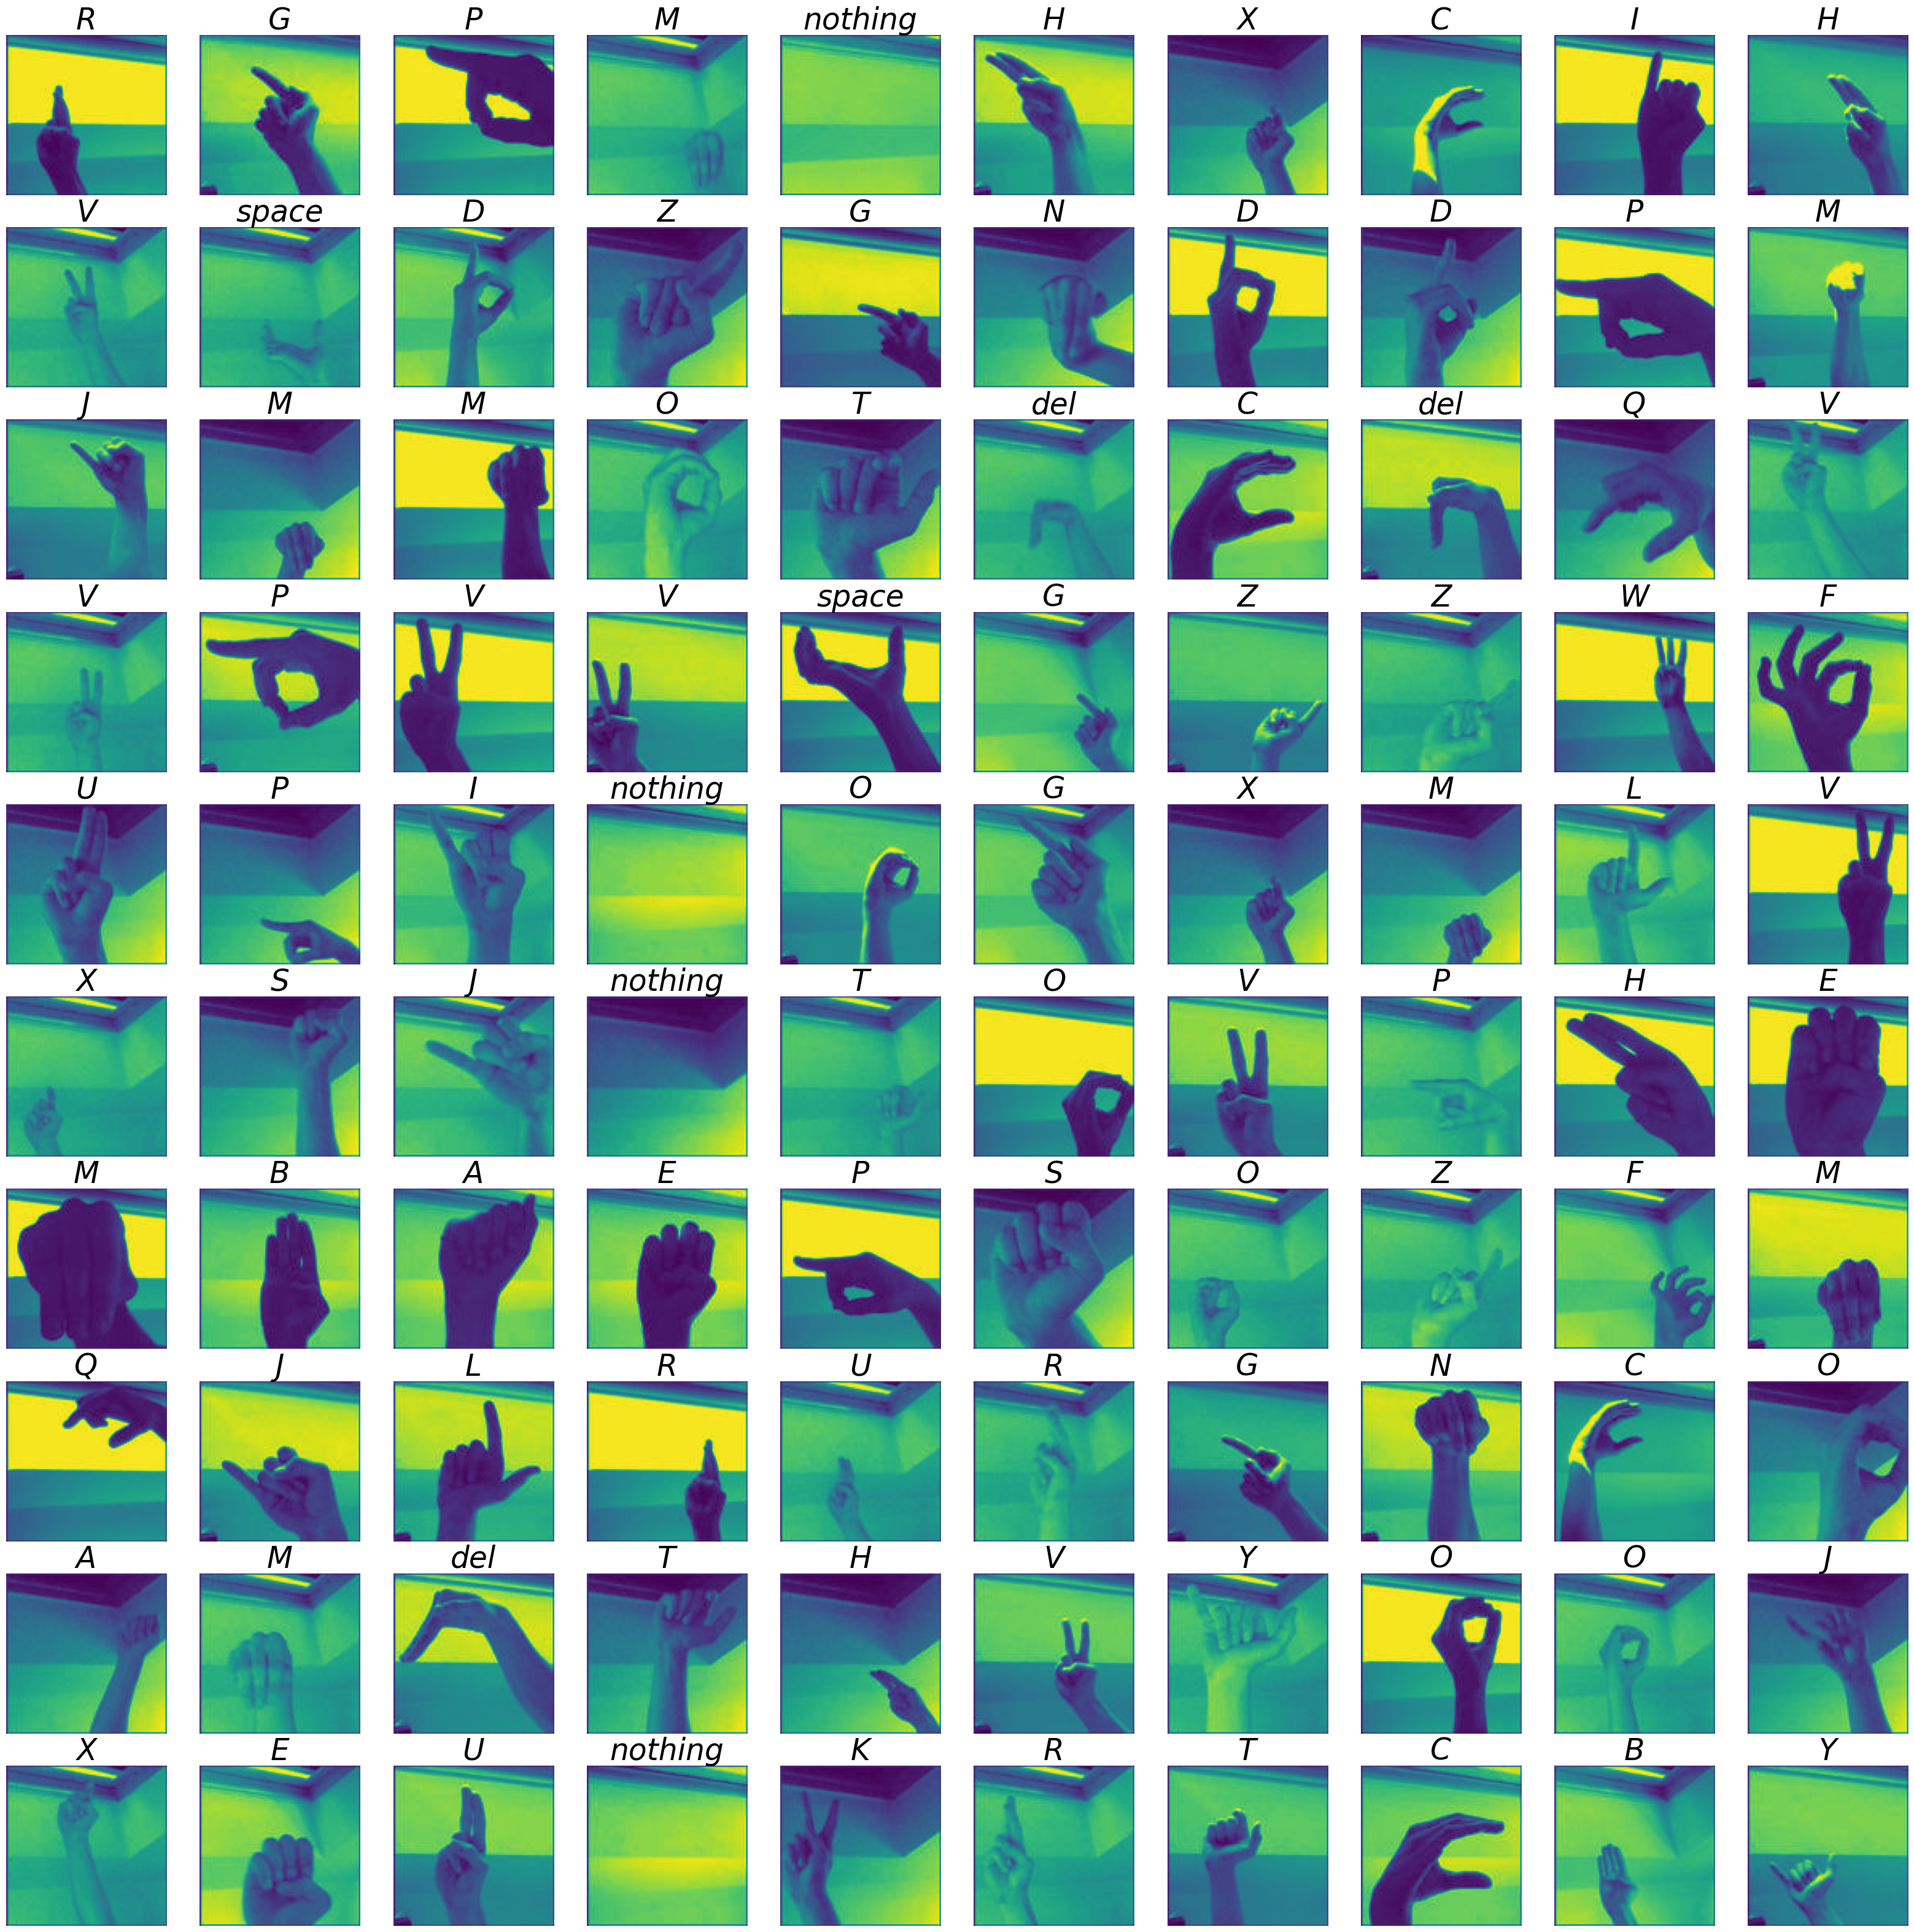

In [5]:
plt.figure(figsize=(40,40))

for i in range(100):
    path = ""
    path = os.path.join(base_path, categories[df.category[i]], df.filename[i])
    img = plt.imread(path)
    plt.subplot(10,10, i + 1)
    plt.imshow(img)
    plt.title(categories[df.category[i]],fontsize=35,fontstyle='italic')
    plt.axis("off")

In [7]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0 / 255,
                             rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [10]:
train_path = 'C:/Users/Dell/Downloads/GSASLdatasets/train/'
val_path = 'C:/Users/Dell/Downloads/GSASLdatasets/val/'
test_path = 'C:/Users/Dell/Downloads/GSASLdatasets/test/'
batch_size = 32
image_size = 100
img_channel = 1
num_classes = 29
learning_rate = 0.01

In [22]:
train = datagen.flow_from_directory(directory=train_path,
                                         target_size=(image_size, image_size),
                                         batch_size=batch_size,
                                          color_mode='grayscale',
                                         class_mode='categorical')

val= datagen.flow_from_directory(directory=val_path,
                                       target_size=(image_size, image_size),
                                       batch_size=batch_size,
                                        color_mode='grayscale',
                                       class_mode='categorical')

test= datagen.flow_from_directory(directory=test_path,
                                        target_size=(image_size, image_size),
                                        batch_size=batch_size,
                                         color_mode='grayscale',
                                        class_mode='categorical',
                                        shuffle=False)

Found 69600 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [59]:
import os
from PIL import Image
import numpy as np

def load_images_from_folder(folder):
    images = []
    labels = []
    class_folders = sorted(os.listdir(folder))
    label_map = {class_name: idx for idx, class_name in enumerate(class_folders)}

    for class_folder in class_folders:
        class_path = os.path.join(folder, class_folder)
        if os.path.isdir(class_path):
            label = label_map[class_folder]
            for image_file in sorted(os.listdir(class_path)):
                image_path = os.path.join(class_path, image_file)
                img = Image.open(image_path)
                img_array = np.array(img)
                images.append(img_array)
                labels.append(label)

    return np.array(images), np.array(labels)

# Path to your main directory containing train, test, and val folders
main_directory = 'C:/Users/Dell/Downloads/GSASLdatasets/'

# Load images and labels for train, test, and val sets
train_dir = os.path.join(main_directory, 'train')
test_dir = os.path.join(main_directory, 'test')
val_dir = os.path.join(main_directory, 'val')

X_train, y_train = load_images_from_folder(train_dir)
X_test, y_test = load_images_from_folder(test_dir)
X_val, y_val = load_images_from_folder(val_dir)

# Display shapes of loaded data
print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)
print("Validation images shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)


Training images shape: (69600, 100, 100)
Training labels shape: (69600,)
Testing images shape: (8700, 100, 100)
Testing labels shape: (8700,)
Validation images shape: (8700, 100, 100)
Validation labels shape: (8700,)


In [60]:
def zero_pad(X, padding):
    """
    Pad with zeros all images of the dataset X

    Argument:
    X --  numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions

    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """
    X_pad = np.pad(X, ((0, 0), (padding, padding), (padding, padding), (0, 0)), 'constant', constant_values=(0, 0))
    return X_pad

In [61]:
class Conv2D:
    """
    A 2D Convolutional Layer in a Neural Network.

    Attributes:
        filters (int): The number of filters in the Convolutional layer.
        filter_size (int): The size of the filters.
        input_channels (int, optional): The number of input channels. Default is 3.
        padding (int, optional): The number of zero padding to be added to the input image. Default is 0.
        stride (int, optional): The stride length. Default is 1.
        learning_rate (float, optional): The learning rate to be used during training. Default is 0.001.
        optimizer (object, optional): The optimization method to be used during training. Default is None.
        cache (dict, optional): A dictionary to store intermediate values during forward and backward pass. Default is None.
        initialized (bool, optional): A flag to keep track of whether the layer has been initialized. Default is False.
    """
    def __init__(self, filters, filter_size, input_channels=3, padding=0, stride=1,learning_rate=0.001, optimizer=None):
        """
        Initialize the Conv2D layer with the given parameters.

        Args:
            filters (int): The number of filters in the Convolutional layer.
            filter_size (int): The size of the filters.
            input_channels (int, optional): The number of input channels. Default is 3.
            padding (int, optional): The number of zero padding to be added to the input image. Default is 0.
            stride (int, optional): The stride length. Default is 1.
            learning_rate (float, optional): The learning rate to be used during training. Default is 0.001.
            optimizer (object, optional): The optimization method to be used during training. Default is None.
        """
        self.filters = filters
        self.filter_size = filter_size
        self.input_channels = input_channels
        self.padding = padding
        self.stride = stride
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.cache = None
        self.initialized = False
        
    def relu(self, Z):
        """
        Implement the ReLU function.

        Arguments:
        Z -- Output of the linear layer

        Returns:
        A -- Post-activation parameter
        cache -- used for backpropagation
        """
        A = np.maximum(0,Z)
        cache = Z 
        return A, cache
    
    def relu_backward(self, dA, activation_cache):
        """
        Implement the backward propagation for a single ReLU unit.

        Arguments:
        dA -- post-activation gradient, of any shape
        activation_cache -- "Z" where we store for computing backward propagation efficiently

        Returns:
        dZ -- Gradient of the cost with respect to Z
        """

        Z = activation_cache
        dZ = np.array(dA, copy=True) # just converting dz to a correct object.)
        # When z <= 0, you should set dz to 0 as well. 
        dZ[Z <= 0] = 0

        return dZ

        
    def conv_single_step(self, a_slice_prev, W, b):
        """
        Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation
        of the previous layer.

        Parameters:
        a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
        W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
        b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
        Returns:
        A -- result of applying the activation function to Z
        cache -- used for backpropagation
        """
        s = np.multiply(a_slice_prev, W)
        Z = np.sum(s)
        Z = Z + float(b)
        return Z

    def forward(self, A_prev):
        """
        Implements the forward propagation for a convolution function

        Parameters:
        A_prev -- output activations of the previous layer,
            numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)

        Returns:
        Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
        cache -- cache of values needed for the conv_backward() function
        """
        #Create list to store activation cache for backprop
        activation_caches = []
        # Initialize neural network
        if self.initialized == False:
            np.random.seed(0)
            self.W = np.random.randn(self.filter_size, self.filter_size, A_prev.shape[-1], self.filters) 
            self.b = np.random.randn(1, 1, 1, self.filters)
            self.initialized = True
        # Retrieve dimensions from A_prev's shape
        (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

        # Retrieve dimensions from W's shape
        (f, f, n_C_prev, n_C) = self.W.shape

        # Compute the dimensions of the  output volume
        n_H = int((n_H_prev - f + (2 * self.padding)) / self.stride) + 1
        n_W = int((n_W_prev - f + (2 * self.padding)) / self.stride) + 1
        # Initialize the output volume Z with zeros.
        Z = np.zeros((m, n_H, n_W, n_C))

        # add padding to A_prev
        A_prev_pad = zero_pad(A_prev, self.padding)
        # loop over the batch of training examples
        for i in range(m):
            # Select ith training example's padded activation
            a_prev_pad = A_prev_pad[i]  
            for h in range(n_H): 
                # Find the vertical start and end 
                vert_start = h * self.stride
                vert_end = vert_start + f
                # loop over horizontal axis of the output volume
                for w in range(n_W):  
                    # Find the horizontal start  
                    horiz_start = w * self.stride
                    horiz_end = horiz_start + f
                    # loop over channels
                    for c in range(n_C):  

                        # Use the corners to define the slice of a_prev_pad
                        a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                        # Convolve the slice with the  filter W and bias b 
                        weights = self.W[:, :, :, c]
                        biases = self.b[:, :, :, c] 
                        Z[i, h, w, c] = self.conv_single_step(a_slice_prev, weights, biases)
                # Apply ReLU activation and store cache for backpropagation
                Z[i], activation_cache = self.relu(Z[i])
                # Append the activation to the caches list
                activation_caches.append(activation_cache)
        
        self.cache = (A_prev, np.array(activation_caches))
    
        return Z

    def backward(self, dZ):
        """
        Implement the backward propagation for a convolution function

        Parameters:
        dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)
        cache -- cache of values needed for the conv_backward(), output of conv_forward()

        Returns:
        dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
                   numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
        dW -- gradient of the cost with respect to the weights of the conv layer (W)
              numpy array of shape (f, f, n_C_prev, n_C)
        db -- gradient of the cost with respect to the biases of the conv layer (b)
              numpy array of shape (1, 1, 1, n_C)
        """
        
        # Retrieve information from "cache"
        A_prev, activation_cache = self.cache
        W, b = self.W, self.b
        # Retrieve dimensions from A_prev's shape
        (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

        # Retrieve dimensions from W's shape
        (f, f, n_C_prev, n_C) = W.shape

        # Retrieve strides, padding information"
        stride = self.stride
        pad = self.padding
        # Activation Gradient
        
        # Retrieve dimensions from dZ's shape
        (m, n_H, n_W, n_C) = dZ.shape

        # Initialize dA_prev, dW, db 
        dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))                           
        self.dW = np.zeros((f, f, n_C_prev, n_C))
        self.db = np.zeros((1, 1, 1, n_C))

        # Pad A_prev and dA_prev
        A_prev_pad = zero_pad(A_prev, pad)
        dA_prev_pad = zero_pad(dA_prev, pad)
        # loop over the training examples
        for i in range(m):
            # Compute gradients of the activation function 
            dZ[i] = self.relu_backward(dZ[i], activation_cache[i])
            # select ith training example from A_prev_pad and dA_prev_pad
            a_prev_pad = A_prev_pad[i]
            da_prev_pad = dA_prev_pad[i]
            # loop over vertical axis of the output volume
            for h in range(n_H):                   
                vert_start = h * stride
                vert_end = vert_start + f
                # loop over horizontal axis of the output volume
                for w in range(n_W):               
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    # loop over the channels of the output volume
                    for c in range(n_C):          
                        # Find a slice using the dimensions
                        a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                        
                        # Update gradients for the window and the filter's parameters 
                        da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                        self.dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                        self.db[:,:,:,c] += dZ[i, h, w, c]
                        
            # Set the ith training example's dA_prev to the unpaded da_prev_pad
            if pad:
                dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]
            else:
                dA_prev[i, :, :, :] = dA_prev[i, :, :, :]
    
        
        self.update_parameters(self.optimizer)
        return dA_prev

    
    def Adam(self, beta1=0.9, beta2=0.999):
        """
        Update parameters using Adam

        Parameters:
        beta1 -- Exponential decay hyperparameter for the first moment estimates 
        beta2 -- Exponential decay hyperparameter for the second moment estimates 
        """
        self.epsilon = 1e-8
        self.v_dW = np.zeros(self.W.shape)
        self.v_db = np.zeros(self.b.shape)
        self.s_dW = np.zeros(self.W.shape)
        self.s_db = np.zeros(self.b.shape)
        self.t = 1

        self.v_dW = beta1 * self.v_dW + (1-beta1) * self.dW
        self.v_db = beta1 * self.v_db + (1-beta1) * self.db
        self.v_dW_corrected = self.v_dW / (1-beta1**self.t)
        self.v_db_corrected = self.v_db / (1-beta1**self.t)

        self.s_dW = beta2 * self.s_dW + (1-beta2) * np.square(self.dW)
        self.s_db = beta2 * self.s_db + (1-beta2) * np.square(self.db)
        self.s_dW_corrected = self.s_dW / (1-beta2**self.t)
        self.s_db_corrected = self.s_db / (1-beta2**self.t)

        self.t += 1

        self.W = self.W - self.learning_rate * (self.v_dW_corrected / (np.sqrt(self.s_dW_corrected) + self.epsilon))
        self.b = self.b - self.learning_rate * (self.v_db_corrected / (np.sqrt(self.s_db_corrected) + self.epsilon))


        
    def update_parameters(self,optimizer=None):
        """
        Updates parameters 
        Parameters:
        Optimizer -- the optimizer used (default) : None           
        """
        if optimizer == 'adam':
            self.Adam()
        else:   
            self.W = self.W - self.learning_rate * self.dW 
            self.b = self.b - self.learning_rate * self.db 

In [62]:
class Pooling2D:
    """
    2D Pooling layer for down-sampling image data.

    Parameters:
    filter_size (int) -- size of the pooling window
    stride (int) -- the stride of the sliding window
    mode (str, optional) -- the pooling operation to use, either 'max' or 'average' (default is 'max')
    """
    
    
    def __init__(self, filter_size, stride, mode='max'):
        """
        Initialize the parameters of the pooling layer.

        Parameters:
        filter_size (int) -- size of the pooling window
        stride (int) -- the stride of the sliding window
        mode (str, optional) -- the pooling operation to use, either 'max' or 'average' (default is 'max')
        """
        self.filter_size = filter_size 
        self.stride = stride
        self.mode = mode


    def forward(self, A_prev):
        """
        Implements the forward pass of the pooling layer

        Parameters:
        A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
        mode -- the pooling mode you would like to use, defined as a string ("max" or "average")

        Returns:
        A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
        cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
        """

        # Retrieve dimensions from the input shape
        (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

        # Retrieve hyperparameters from "hparameters"
        f = self.filter_size
        stride = self.stride

        # Define the dimensions of the output
        n_H = int(1 + (n_H_prev - f) / stride)
        n_W = int(1 + (n_W_prev - f) / stride)
        n_C = n_C_prev 

        # Initialize output matrix A
        A = np.zeros((m, n_H, n_W, n_C))              
        # loop over the training examples
        for i in range(m):
            # loop on the vertical axis of the output volume
            for h in range(n_H):                     
                # Find the vertical start and end 
                vert_start = h * stride
                vert_end = vert_start + f
                # loop on the horizontal axis of the output volume
                for w in range(n_W):                 
                   #Find the vertical start and end  
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                     # loop over the channels of the output volume
                    for c in range (n_C):           

                        # Use the corners to define the current slice on the ith training example of A_prev, channel c. 
                        a_prev_slice = A_prev[i,vert_start:vert_end,horiz_start:horiz_end,c]
                        #Compute the pooling operation on the slice. 
                        #determine the pooling mode
                        if self.mode == "max":
                            A[i, h, w, c] = np.max(a_prev_slice)
                        elif self.mode == "average":
                            A[i, h, w, c] =  np.mean(a_prev_slice)


        # Store the input for backpropagation
        self.cache = (A_prev)

        return A
    
    
    
         
    def create_mask_from_window(self, x):
        """
        Creates a mask from an input matrix x, to identify the max entry of x.

        Parameters:
        x -- Array of shape (f, f)

        Returns:
        mask -- Array of the same shape as window, contains a True at the position corresponding to the max entry of x.
        """    

        mask = (x == x.max())

        return mask
    
    
    def distribute_value(self, dz, shape):
        """
        Distributes the input value in the matrix of dimension shape

        Parameters:
        dz -- input scalar
        shape -- the shape (n_H, n_W) of the output matrix for which we want to distribute the value of dz

        Returns:
        a -- Array of size (n_H, n_W) for which we distributed the value of dz
        """    
        # Retrieve dimensions from shape 
        (n_H, n_W) = shape

        # Compute the value to distribute on the matrix 
        average = dz / (n_H * n_W)

        # Create a matrix where every entry is the average value 
        a = np.ones((n_H, n_W)) * average
  
        return a

                            
                            
    def backward(self, dA):
        """
        Implements the backward pass of the pooling layer

        Parameters:
        dA -- gradient of cost with respect to the output of the pooling layer, same shape as A
        cache -- cache output from the forward pass of the pooling layer, contains the layer's input

        Returns:
        dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev
        """
        # Retrieve information from cache 
        A_prev = self.cache

        stride = self.stride
        f = self.filter_size

        # Retrieve dimensions from A_prev's shape and dA's shape 
        m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
        m, n_H, n_W, n_C = dA.shape

        # Initialize dA_prev with zeros 
        dA_prev = np.zeros((A_prev.shape))

        # loop over the training examples
        for i in range(m): 

            # select training example from A_prev 
            a_prev = A_prev[i, :, :, :]
            # loop on the vertical axis
            for h in range(n_H):
                # loop on the horizontal axis
                for w in range(n_W):
                    # loop over the channels  
                    for c in range(n_C):           

                        # Find the corners  
                        vert_start = h * stride
                        vert_end = vert_start + f 
                        horiz_start = w * stride
                        horiz_end = horiz_start + f

                        # Compute the backward propagation of the chosen mode
                        if self.mode == "max":

                            # Use the corners and "c" to define the current slice from a_prev 
                            a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]

                            # Create the mask from a_prev_slice 
                            mask = self.create_mask_from_window(a_prev_slice)

                            # Set dA_prev to be dA_prev + (the mask multiplied by the correct entry of dA) 
                            dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += (mask * dA[i, h, w, c])

                        elif self.mode == "average":

                            # Get the value da from dA 
                            da = dA[i, h, w, c]

                            # Define the shape of the filter as fxf 
                            shape = (f,f)

                            # Distribute it to get the  slice of dA_prev. 
                            dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += self.distribute_value(da, shape)

        return dA_prev

In [63]:
class Flatten:
    """
    A class for flattening the input tensor in a neural network.
    """
    
    def __init__(self):
        """
        Initialize the input shape to None.
        """
        self.input_shape = None

        
    def forward(self, X):
        """Implement the forward pass.

        Parameters:
        X (numpy.ndarray): The input tensor.

        Returns:
        numpy.ndarray: The flattened input tensor.
        """
        # Store the input shape
        self.input_shape = X.shape
        # Flatten the input tensor
        return X.reshape(X.shape[0], -1)
    
    
    def backward(self, dout):
        """Implement the backward pass.

        Parameters:
        dout (numpy.ndarray): The gradient of the loss with respect to the output of this layer.

        Returns:
        numpy.ndarray: The reshaped gradient tensor.
        """
        # Reshape the gradient back to the original shape
        return dout.reshape(self.input_shape)

In [64]:
class Dense:
    """

    A class representing a dense layer in a neural network.
    """

    def __init__(self, units, activation="relu", optimizer=None, learning_rate=0.001):
        """
        Initialize the dense layer with the given number of units and activation function.

        Parameters:
        -----------
        :units: (int), the number of units in the dense layer.
        :activation: (str), the activation function to use, either 'relu' or 'softmax'.
        :optimizer: (str), the optimizer to use for updating the weights.
        : learning_rate: (float), the learning rate to use during training.
        """
        self.units = units  # the number of units in the dense layer
        self.W = None  # weight matrix
        self.b = None  # bias vector
        self.activation = activation  # activation function
        self.input_shape = None  # shape of the input
        self.optimizer = optimizer  # optimizer
        self.learning_rate = learning_rate  # learning rate

        
    def forward(self, A):
        """
        Perform the forward pass of the dense layer.

        Parameters:
        -----------
        :A: (ndarray), the input data of shape (batch_size, input_shape).

        :return: (ndarray), the output of the dense layer, shape (batch_size, units).
        """
        # if the weights have not been initialized, initialize weights
        if self.W is None:
            self.initialize_weights(A.shape[1])
        # store the input for use in backward pass
        self.A = A
        # compute the linear transformation
        out = np.dot(A, self.W) + self.b
        # apply activation function
        if self.activation == "relu":
            out = np.maximum(0, out)
        elif self.activation == "softmax":
            out = np.exp(out) / np.sum(np.exp(out), axis=1, keepdims=True)

        return out

    
    def initialize_weights(self, input_shape):
        """
        Initialize the weights of the dense layer.
        Parameters:
        -----------
            input_shape: (int), the shape of the input data.
        """
        np.random.seed(0)
        # store the input shape
        self.input_shape = input_shape
        # initialize weights with small random values
        self.W = np.random.randn(input_shape, self.units) * 0.01
        # initialize bias with zeros
        self.b = np.zeros((1, self.units))

        
    def cross_entropy_loss(self, y_true, y_pred):
        """
        Compute the cross entropy loss between the true labels and the predicted labels.

        Parameters
        ----------
          y_true: (ndarray), the true labels of shape (batch_size, num_classes).
          y_pred: (ndarray), the predicted labels of shape (batch_size, num_classes).

        Returns
        -------
        numpy.ndarray, the cross entropy loss.
        """
        # compute cross entropy loss
        loss = - np.mean(y_true * np.log(y_pred + 1e-7))  
        return loss

    
    def backward(self, dout):
        """
        Perform the backward pass for this dense layer.

        Parameters
        ----------
        dout : numpy.ndarray
            Gradients of the loss with respect to the output of this layer.
            Shape: (batch_size, units)

        Returns
        -------
        numpy.ndarray
            Gradients of the loss with respect to the input of this layer.
            Shape: (batch_size, input_shape)
        """
        # Calculate the gradients with respect to the inputs
        dA = np.dot(dout, self.W.T)
        # Calculate the gradients with respect to the weights
        self.dW = np.dot(self.A.T, dout)
        # Calculate the gradients with respect to the biases
        self.db = np.sum(dout, axis=0, keepdims=True)

        # Update the weights and biases
        self.update_parameters(self.optimizer)
        return dA
    

    def update_parameters(self, optimizer=None):
        """
         Updates parameters using choosen optimizer
         Parameters:
         Optimizer -- the optimizer used (default) : None
         """
        if self.optimizer == 'adam':
            self.Adam()
        else:
            self.W -= self.learning_rate * self.dW
            self.b -= self.learning_rate * self.db


    def Adam(self, beta1=0.9, beta2=0.999):
        """
        Update parameters using Adam
    
        Parameters:
        beta1 -- Exponential decay hyperparameter for the first moment estimates
        beta2 -- Exponential decay hyperparameter for the second moment estimates
        """
        self.v_dW = np.zeros(self.W.shape)
        self.v_db = np.zeros(self.b.shape)
        self.s_dW = np.zeros(self.W.shape)
        self.s_db = np.zeros(self.b.shape)
    
        self.v_dW = beta1 * self.v_dW + (1 - beta1) * self.dW
        self.v_db = beta1 * self.v_db + (1 - beta1) * self.db
    
        self.v_dW = self.v_dW / (1 - beta1 ** 2)
        self.v_db = self.v_db / (1 - beta1 ** 2)
    
        self.s_dW = beta2 * self.s_dW + (1 - beta2) * np.square(self.dW)
        self.s_db = beta2 * self.s_db + (1 - beta2) * np.square(self.db)
    
        self.s_dW = self.s_dW / (1 - beta2 ** 2)
        self.s_db = self.s_db / (1 - beta2 ** 2)
    
        self.W = self.W - self.learning_rate * self.dW
        self.b = self.b - self.learning_rate * self.db

In [65]:
class CNN:
    """
    A class representing a Convolutional Neural Network.
    
    Parameters:
    -----------
    layers : list
        A list of instances of the layer classes in this network.
    learning_rate : float, optional (default=0.001)
        The learning rate for the network.
    optimizer : object, optional
        An instance of an optimization algorithm.
    
    Attributes:
    -----------
    layers : list
        A list of instances of the layer classes in this network.
    learning_rate : float
        The learning rate for the network.
    optimizer : str
        Optimziation algorithm to be used
    """
    def __init__(self,layers, learning_rate=0.001, optimizer=None):
        self.layers = layers
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.initialize_network()
        
        
    def initialize_network(self):
        """
        A method to initialize the network. It sets the learning rate and optimizer 
        of the layers in the network to the network's learning rate and optimizer.
        """
        for layer in self.layers:
            if isinstance(layer, Dense) or isinstance(layer, Conv2D):
                layer.learning_rate  = self.learning_rate
                layer.optimizer = self.optimizer
    
    
    def forward(self, inputs):
        """
        A method to perform the forward pass of the network.
        
        Parameters:
        -----------
        inputs : numpy array
            The input to the network.
        
        Returns:
        --------
        outputs : numpy array
            The output of the network.
        """
        inputs = self.layers[0].forward(inputs)
        for layer in self.layers[1:]:
            inputs = layer.forward(inputs)
        return inputs
    
    
    
    def backward(self, inputs):
        """
        A method to perform the backward pass of the network.
        
        Parameters:
        -----------
        inputs : numpy array
            The input to the network's backward pass.
        
        Returns:
            None
        """
        inputs = self.layers[-1].backward(inputs)
        for layer in reversed(self.layers[:-1]):
            inputs = layer.backward(inputs)

    
    
    def compute_cost(self, y_true, y_pred):
        """
        A method to compute the cost of the network's predictions.
        
        Parameters:
        -----------
        y_true : numpy array
            The true labels.
        y_pred : numpy array
            The predicted labels.
        
        Returns:
        --------
        cost : float
            The cost of the network's predictions.
        """
        if isinstance(self.layers[-1], Dense):
            cost = self.layers[-1].cross_entropy_loss(y_true, y_pred)
            return cost
        else:
            raise ValueError("The last layer in the layers list should be a Dense layer.")
    
    
            
    def step_decay(self, epoch, lr, decay_rate=0.1, decay_step=10, lowest_learning_rate=1e-05):
        """
        A function that implements step decay for the learning rate.

        Parameters:
        -----------
        epoch : int
            The current epoch number.
        lr : float
            The current learning rate.
        decay_rate : float, optional (default=0.1)
            The decay rate of the learning rate.
        decay_step : int, optional (default=10)
            The number of epochs after which the learning rate will be decayed.

        Returns:
        --------
        new_lr : float
            The updated learning rate after decay.
        """
        if lr > lowest_learning_rate:
            new_lr = lr * (decay_rate ** (epoch // decay_step))
        else:
            new_lr = lr
        return new_lr

    
    
    def fit(self, X, y, epochs=15, decay_rate=0.2, print_cost=True, plot_cost=False):
        """Trains the CNN model on the input data (X) and target data (y)

        Parameters:
            X (np.ndarray): Input data with shape (number_of_examples, height, width,  num_channels)
            y (np.ndarray): Target data with shape (number_of_examples, num_classes)
            epochs (int): Number of iterations to train the model. Default is 10.
            print_cost (bool): If True, print cost value for each iteration. Default is True.
            plot_cost (bool): If True, plot cost value for each iteration. Default is False.

        Returns:
            None
        """
        costs = []
        for i in range(epochs):
            
            # Update the learning rate using the step decay function
            self.learning_rate = self.step_decay(i, self.learning_rate, decay_rate)

            # Forward pass: Compute the predictions
            predictions = self.forward(X)

            # Compute the cost value
            cost = self.compute_cost(y, predictions)
            accuracy = (np.argmax(predictions, axis=1) == np.argmax(y, axis=1)).mean()
            # Backward pass: Compute the gradients
            dout = predictions - y
            gradients = self.backward(dout)

            # Append the cost value to the list of costs
            costs.append(cost)

            # Print the cost value if print_cost is True
            if print_cost:
                print(f"the cost for iteration {i} = {cost}, accuracy = {str(accuracy*100)}%")

        # Plot the cost values if plot_cost is True
        # if plot_cost:
        #     fig = px.line(y=np.squeeze(costs),title='Cost',template="plotly_dark")
        #     fig.update_layout(
        #         title_font_color="#f6abb6", 
        #         xaxis=dict(color="#f6abb6"), 
        #         yaxis=dict(color="#f6abb6") 
        #     )
        #     fig.show()
           

    
            
    def predict(self, X):
        """Make predictions on the input data (X) using the trained CNN model.

        Parameters:
            X (np.ndarray): Input data with shape (number_of_examples, height, width,  num_channels)

        Returns:
            np.ndarray: Predictions with shape (number_of_examples, num_classes)
        """
        predictions = self.forward(X)
        return predictions
    

    
    def evaluate(self, X, y):
        """Evaluate the performance of the CNN model on the input data (X) and true labels (y).

        Parameters:
            X (np.ndarray): Input data with shape (number_of_examples, height, width,  num_channels)
            y (np.ndarray): True labels with shape (number_of_examples, num_classes)

        Returns:
            float: Loss calculated using the model's loss function
            float: Accuracy score calculated as (number of correct predictions) / (number of examples)
        """
        y_pred = self.predict(X)
        loss = self.compute_cost(y, y_pred)
        accuracy = ((np.argmax(y_pred, axis=1) == np.argmax(y, axis=1)).mean()) * 100
        return f'{accuracy}%'

In [66]:
conv2d = Conv2D(8, 3, padding=0,learning_rate=0.01)
maxpool = Pooling2D(2,2,'max')
flatten = Flatten()
dense_relu = Dense(128, activation='relu')
dense = Dense(10,activation='softmax')

In [67]:
layers = [conv2d, maxpool, flatten,dense_relu, dense]

In [68]:
cnn = CNN(layers, learning_rate=0.01, optimizer='adam')

In [72]:

cnn.fit(X_train, y_train, 15, 0.01, True, True)

ValueError: not enough values to unpack (expected 4, got 3)